# Problem 21: Caption Contest

_Version 1.4b_

This problem is a data mining task that exercises basic data structure manipulation, strings (and maybe regex!), and translation of simple math to code. It has 5 exercises, numbered 0-4. These depend on one another as follows.
- Exercises 0 (1 point), 1 (3 points), 2 (2 points), and 3 (2 points) are all independent from one another. Therefore, you can do any of them for partial credit.
- Exercise 4 (2 points) depends on successful completion of Exercise 3.

**Pro-tips.**
- If your program behavior seem strange, try resetting the kernel and rerunning everything.
- If you mess up this notebook or just want to start from scratch, save copies of all your partial responses and use `Actions` $\rightarrow$ `Reset Assignment` to get a fresh, original copy of this notebook. (_Resetting will wipe out any answers you've written so far, so be sure to stash those somewhere safe if you intend to keep or reuse them!_)
- If you generate excessive output (e.g., from an ill-placed `print` statement) that causes the notebook to load slowly or not at all, use `Actions` $\rightarrow$ `Clear Notebook Output` to get a clean copy. The clean copy will retain your code but remove any generated output. **However**, it will also **rename** the notebook to `clean.xxx.ipynb`. Since the autograder expects a notebook file with the original name, you'll need to rename the clean notebook accordingly.

**Good luck!**

## Background

Every week, the New Yorker magazine runs a cartoon caption contest. It presents readers with a cartoon having no caption, and then invites readers to submit their ideas.

For example, run the following code cell to see a cartoon from a couple weeks ago:

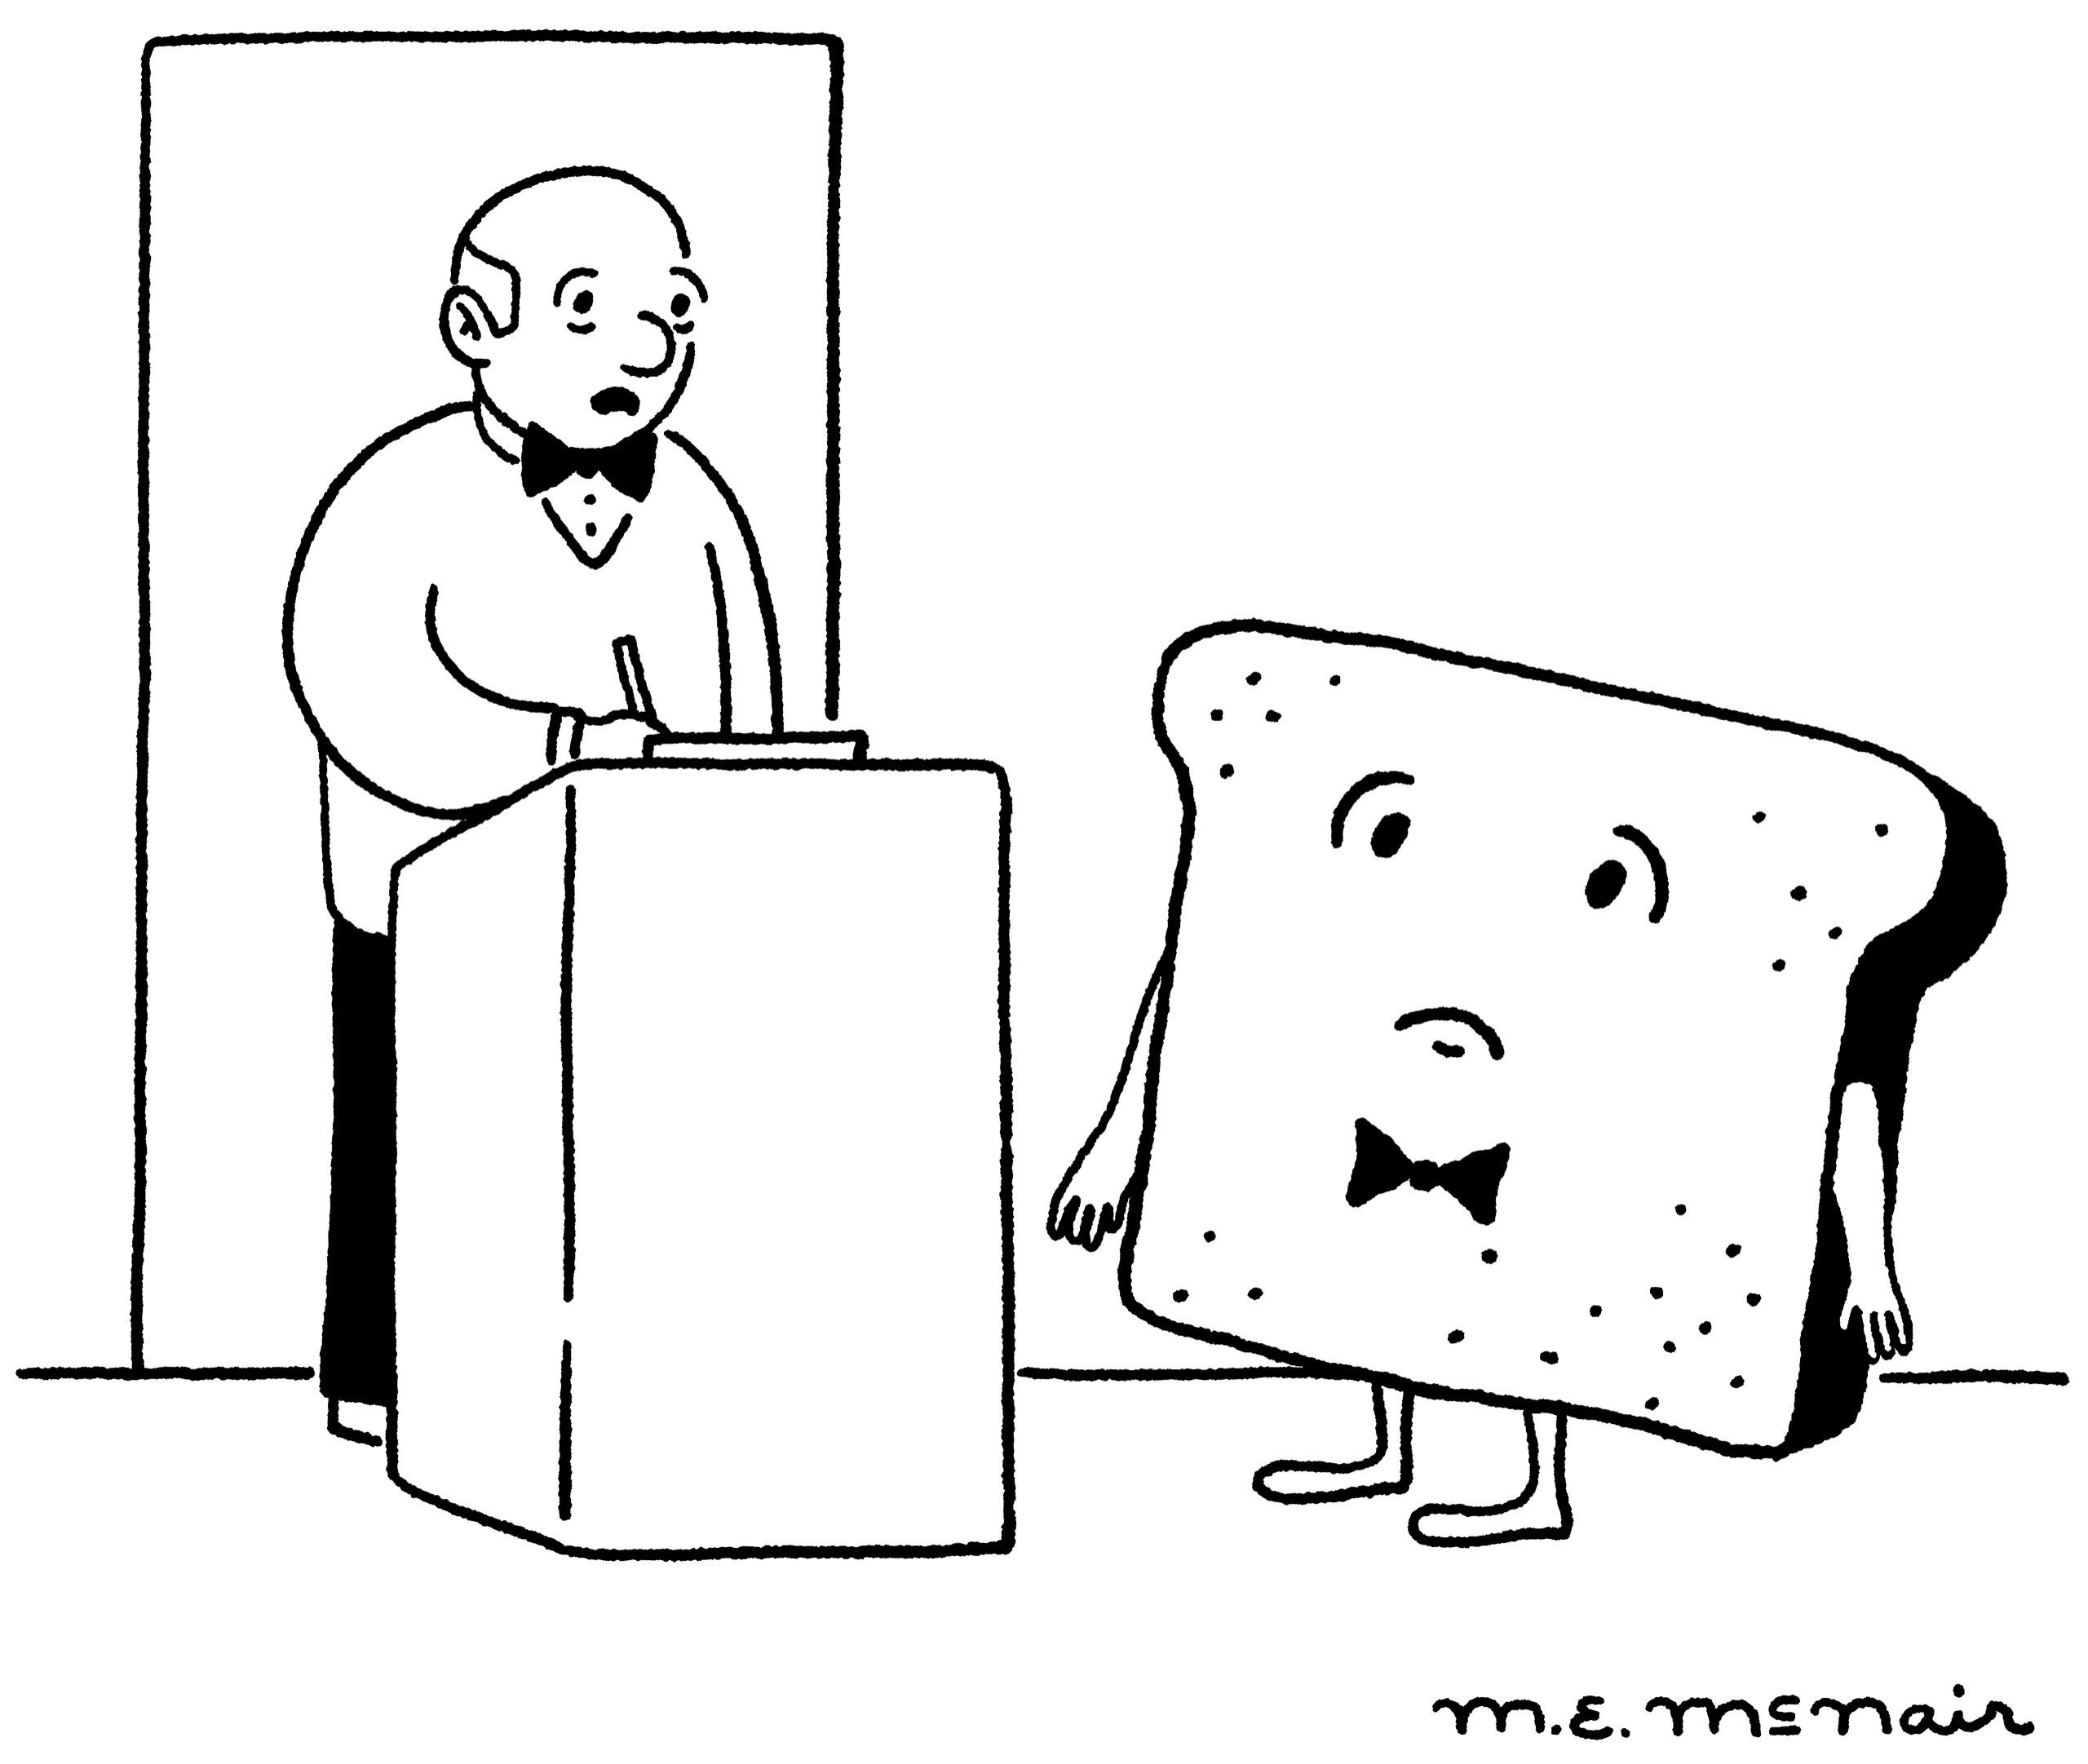

In [1]:
from problem_utils import get_path, display_image

display_image(get_path("toast/image.png")) # Number 695 at https://www.newyorker.com/cartoons/contest

You should see a picture of a piece of bread, wearing a bowtie, standing in front of a host stand at a restaurant or other event.

**The data.** The New Yorker allows readers to [vote on the submitted captions](http://nextml.org/captioncontest). For this problem, we scraped the voting website to get these submissions, which will serve as your dataset. (These data are just the captions, not the votes.)

The data are stored in a JSON file, which Python can easily read using the [`json` module](https://docs.python.org/3/library/json.html). Run the next code cell to load the submitted caption data and inspect the first four captions:

In [2]:
import json

with open(get_path('toast/captions.json'), 'rt', encoding='utf-8') as fp:
    captions_json = json.load(fp)
    
print(f"==> The dataset contains {len(captions_json)} captions. The first four are:")
captions_json[:4]

==> The dataset contains 2458 captions. The first four are:


[{'target_id': 0,
  'primary_type': 'text',
  'primary_description': 'I told you not to pick the one from the pilot experiment...'},
 {'target_id': 1,
  'primary_type': 'text',
  'primary_description': 'Well that explains the gas station'},
 {'target_id': 2,
  'primary_type': 'text',
  'primary_description': "The dairy-free vegan soy cheese doesn't seem to be having the same effect..."},
 {'target_id': 3,
  'primary_type': 'text',
  'primary_description': 'Repeatedly, cheese demonstrated characteristics of a performance enhancing drug'}]

Observe that the variable holding this caption data, `captions_json`, is a list of dictionaries. Each list element is the data for a single caption, where the _caption text_ itself is a string value associated with the `primary_description` key.

## Your task: Data mining the captions for "comedic gold"

There are a lot of submissions (even more than the 2,400+ in the data above), but the first four captions above are kind of strange, and do not seem to match the image. Can we mine the submissions to find more relevant, and even funny, ones, automatically? That is your task in the exercises below.

> When the exam is over, you should see if you can come up with even better schemes than what is developed here!

### Extraction and basic cleaning

**Exercise 0** (1 point). Complete the function `get_captions(captions_json)`, below, subject to these requirements:

1. The input, `captions_json`, is an object just like the one loaded above (a list of dictonaries with the given keys and values).
2. The function returns a list of just the text (string) captions.

For example, after running

```python
    captions_orig = get_captions(captions_json)
```

the returned value, `captions_orig`, should look like

```python
    captions_orig == ['I told you not to pick the one from the pilot experiment...',
                      'Well that explains the gas station',
                      "The dairy-free vegan soy cheese doesn't seem to be having the same effect...",
                      'Repeatedly, cheese demonstrated characteristics of a performance enhancing drug',
                      ... # and so on
                     ]
```

**Your function must return the captions in the order that they appear in the original list.**

In [3]:
def get_captions(captions_json):
    ###
    res = []
    for i in captions_json:
            res.append(i['primary_description'])
    return res

    ###


In [4]:
# Demo of your function:
captions_orig = get_captions(captions_json)
assert captions_orig[:4] == ['I told you not to pick the one from the pilot experiment...',
                             'Well that explains the gas station',
                             "The dairy-free vegan soy cheese doesn't seem to be having the same effect...",
                             'Repeatedly, cheese demonstrated characteristics of a performance enhancing drug']

In [5]:
# Test cell: `ex0_get_captions` (1 point)

print("""
This test cell is marked as having a hidden test, but does not.
The testing code is exposed, below, but the solution values
are masked using hashed values.
""")

###
### AUTOGRADER TEST - DO NOT REMOVE
###

def ex0_check__(captions):
    from problem_utils import make_hash, check_hash
    with open(get_path('toast/ex0_soln.csv'), 'rt') as fp:
        solns = [s.strip() for s in fp.readlines()]
        if len(captions) != len(solns):
            print(f"Your solution has {len(captions)} captions, whereas we are expecting {len(solns)}!")
        for k, (your_caption, hashed_soln) in enumerate(zip(captions, solns)):
            assert check_hash(your_caption, hashed_soln), \
                f"*** Your caption {k}, '{your_caption}', does not match our expected solution. ***\n" \
                f"==> Expected hash value: {hashed_soln}"

ex0_check__(captions_orig)

print("\n(Passed!)")


This test cell is marked as having a hidden test, but does not.
The testing code is exposed, below, but the solution values
are masked using hashed values.


(Passed!)


**Words.** Given a caption, we want to analyze just the words that appear in the caption.

When moving through a string from left-to-right, define each _word_ to be the longest contiguous sequence of alphabetic characters (or just _letters_), _including up to one apostrophe if that apostrophe is sandwiched between two letters_. (An apostrophe is a single quote, `'`.)

For instance, consider the string caption,

```python
"I'm sorry, sir, but this is a 'gluten-free' restaurant. We don't serve bread."
```

Its words are: `"I'm"`, `"sorry"`, `"sir"`, `"but"`, `"this"`, `"is"`, `"a"`, `"gluten"`, `"free"`, `"restaurant"`, `"we"`, `"don't"`, `"serve"`, and `"bread"`. Notice that `"I'm"` and `"don't"` _are_ words, since they include one apostrophe between two letters. However, observe that the substring, `"'gluten-free'"` becomes `"gluten"` and `"free"`: the hyphen (`"-"`) is treated as a separator, and the leading and trailing apostrophes do **not** become part of the word.

> *Hint*: Heed the definition, "_... including **up to one** apostrophe if that apostrophe is **sandwiched between two letters**_." Consider these two examples:
>
> ```python
  clean("'tricky''case'xyz 1") == ['tricky', "case'xyz"]
  clean("'tricky''case'xyz'two") == ['tricky', "case'xyz", "two"]
  ```

**Exercise 1** (3 points). Given a string caption, `s`, complete the function, `clean(s)`, so that it does the following:

1. Converts `s` to lowercase.
2. Returns a list of the words in `s`, defined as above.

The list returned must contain the words in the order that they appear in the sentence.

For example:

```python
assert clean("Please sir, that's obviously a clip-on.") \
       == ['please', 'sir', "that's", 'obviously', 'a', 'clip', 'on']
assert clean("I'm sorry, sir, but this is a 'gluten-free' restaurant. We don't serve bread.") \
       == ["i'm", 'sorry', 'sir', 'but', 'this', 'is', 'a', 'gluten', 'free', 'restaurant', 'we', "don't", 'serve', 'bread']
```

> _Hint_: While its use is not required, regular expression processing is a good tool for this problem.

In [6]:
def clean(s):
    ###
    import re
   
    your_regex_pattern = r"[a-zA-Z]+[\']?[a-zA-Z]+|[a-zA-Z]+"
    return re.findall(your_regex_pattern, s.lower(), re.VERBOSE)
    
    ###


In [7]:
# Test cell: `ex1_clean_a` (0.5 points)

# Caption 123:
assert clean("Please sir, that's obviously a clip-on.") \
       == ['please', 'sir', "that's", 'obviously', 'a', 'clip', 'on']

# Caption 314:
assert clean("I'm sorry, sir, but this is a 'gluten-free' restaurant. We don't serve bread.") \
       == ["i'm", 'sorry', 'sir', 'but', 'this', 'is', 'a', 'gluten', 'free', 'restaurant', 'we', "don't", 'serve', 'bread']

# Some other tricky cases!
assert clean("'tricky''case'xyz 1") == ['tricky', "case'xyz"]
assert clean("'tricky''case'xyz'two") == ['tricky', "case'xyz", "two"]

print("\n(Passed!)")


(Passed!)


In [8]:
# Test cell: `ex1_clean_b` (2.5 points)

print("""
This test cell is marked as having a hidden test, but does not.
The testing code is exposed, below, but the solution values
are masked using hashed values.
""")

###
### AUTOGRADER TEST - DO NOT REMOVE
###

def ex1_gen_case__(n, m, s):
    assert n >= 1 and m >= 1 and s >= 1
    from random import randint, random, choice
    def rand_char(): return chr(ord('a') + randint(0, 25))
    def rand_upper(c): return c.upper() if random() <= 0.1 else c
    def rand_chars():
        m0 = randint(1, m)
        return ''.join([rand_upper(rand_char()) for _ in range(m0)])
    def rand_word():
        a = rand_chars()
        if random() <= 0.1:
            a += "'" + rand_chars()
        return a
    def rand_spaces(): return ''.join([choice(' \t\n') for _ in range(randint(1, s))])
    def rand_quote(): return "'" if random() <= 0.1 else ""
    def rand_punc(): return choice(r'`~!@#$%^&*()-_=+{[]}|;:"<>,.?/\'') if random() <= 0.1 else ""
    soln = []
    for k in range(randint(1, n)):
        if len(soln) == 0:
            x = rand_spaces() if random() <= 0.2 else rand_quote()
        else:
            x += rand_spaces() + rand_quote()
        w = rand_word()
        soln.append(w.lower())
        x += w
        x += rand_quote() + rand_punc()
    return x, soln

def ex1_check_case__(n, m, s, verbose=False):
    x, soln = ex1_gen_case__(n, m, s)
    your_soln = clean(x)
    matches = (your_soln == soln)
    if verbose or (not matches):
        print("- Input:", repr(x))
        print("- Expected solution:", soln)
        print("- Your solution:", your_soln)
        assert matches, "*** Failed on a random test case: see above ***"
    
print("Testing 100 randomly generated cases...")
for _ in range(100):
    ex1_check_case__(10, 8, 3)
    
print("\n(Passed!)")


This test cell is marked as having a hidden test, but does not.
The testing code is exposed, below, but the solution values
are masked using hashed values.

Testing 100 randomly generated cases...

(Passed!)


**Cleaned captions.** In case you can't get your function above working, we have prepared a file of pre-cleaned captions. Below, the variable `captions_clean` is a list of _strings_, with the "clean" tokens separated by a single space, making them easy to split back into words. The subsequent exercises will use this variable (so don't modify it!).

In [9]:
with open(get_path('toast/captions_cleaned.txt')) as fp:
    captions_clean = [c.strip() for c in fp.readlines()]
print(repr(captions_clean[123]))
print(repr(captions_clean[314]))

"please sir that's obviously a clip on"
"i'm sorry sir but the toastmasters meetings are on tuesday"


### Captions as "bags of words"

Next, let's convert the captions into a "standard form," to help simplify our subsequent analysis.

**Stop words.** First, not all words in a caption carry meaning. For example, the word `"the"` occurs commonly, but let's assume$^\dagger$ that it isn't useful. In the area of natural language processing, such words are called _stop words_.

Run the code cell below, which will create a list of stop words in an object named `stopwords`. Observe its type and contents.

> $^\dagger$ This assumption may or may not be reasonable in the case of jokes, where these words can sometimes completely change the nuance of a joke. But for this problem, let's just go with it.

In [10]:
from stopwords import stopwords

print(type(stopwords), ":", stopwords)

print("\nExamples:")
for ex in ["shouldn't", "toast"]:
    is_or_isnt = "is" + ("" if ex in stopwords else " *not*")
    print(f'- "{ex}"', is_or_isnt, "a stop word.")

<class 'set'> : {'after', 'by', 'were', 'or', 'this', "that's", 'yourself', 'again', 'him', 'own', 'theirs', 'than', 'below', 'before', "we'd", 'no', 'does', 'over', 'about', "who's", "i'd", 'when', 'most', "he'd", 'from', 'has', "weren't", "can't", "let's", 'between', 'herself', 'in', 'their', "hasn't", 'was', 'hers', "haven't", 'who', "you'll", 'for', 'too', "doesn't", 'further', 'at', "i'll", 'myself', 'his', 'yourselves', 'up', 'to', "we're", 'they', 'above', 'same', "it's", 'themselves', 'been', 'be', "here's", 'other', 'are', "they're", 'until', "we'll", "what's", 'you', 'not', "she'll", 'some', 'once', "she'd", 'would', "you're", 'each', 'an', 'on', "mustn't", "you've", 'with', 'your', 'through', 'there', "shouldn't", 'off', "there's", "how's", 'being', "won't", 'me', 'both', 'my', 'her', "aren't", "wouldn't", 'where', 'its', 'do', 'having', 'out', "why's", 'is', 'yours', 'had', "he'll", 'such', 'doing', 'should', "wasn't", 'what', 'only', 'under', 'itself', 'a', 'here', 'it', '

**The "bag of words" model.** Let `c` be a **cleaned** caption. That is, assume it is *already* cleaned per Exercise 1 above. Its bag-of-words representation is the _set_ of its words that are **not** stop words.

For example, if `c` is the cleaned caption,

```python
    c == "you're in luck a slot for you just opened up in our kitchen"
```

then its bag of words representation is a Python set of the form,

```python
    {'just', 'kitchen', 'luck', 'opened', 'slot'}
```

Notice that the words, `"you're"`, `"in"`, `"a"`, `"for"`, `"you"`, `"up"`, and `"our"` are all omitted from the bag of words representation, since they are all stop words. Also, since `c` is clean, it is easy to identify words by using simple spaces as delimiters.

> The bag-of-words representation is a _set_. Therefore, even if a caption repeats a non-stop word, that word will appear at most once "in the bag."

**Exercise 2** (2 points). Implement the function, `bag_of_words(c)`, so that it returns the bag-of-words representation of `c` as a Python set.

For example:

```python
    assert bag_of_words("you're in luck a slot for you just opened up in our kitchen") \
           == {'just', 'kitchen', 'luck', 'opened', 'slot'}
    assert bag_of_words("i'm sorry the toastmasters gala is for members only") \
           == {'gala', 'members', 'sorry', 'toastmasters'}
```

In [11]:
def bag_of_words(c):
    # Assume `c` is already clean per Exercise 1
    ###
    c = set(c.split())-stopwords
    return c
    
    ###
bag_of_words("you're in luck a slot for you just opened up in our kitchen")

{'just', 'kitchen', 'luck', 'opened', 'slot'}

In [12]:
# Demo of your function:
print(bag_of_words("you're in luck a slot for you just opened up in our kitchen"))
print(bag_of_words("i'm sorry the toastmasters gala is for members only"))

{'kitchen', 'just', 'luck', 'opened', 'slot'}
{'gala', 'members', 'toastmasters', 'sorry'}


In [13]:
# Test cell: `ex2_bag_of_words` (2 points)

print("""
This test cell is marked as having a hidden test, but does not.
The testing code is exposed, below, and uses randomly generated
test cases to evaluate your implementation.
""")

###
### AUTOGRADER TEST - DO NOT REMOVE
###

def ex2_gen_case__(n, m):
    assert n >= 1 and m >= 1
    from random import randint, random, choice
    def rand_char(): return chr(ord('a') + randint(0, 25))
    def rand_chars():
        m0 = randint(1, m)
        return ''.join([rand_char() for _ in range(m0)])
    def rand_word():
        if random() <= 0.2:
            return choice(list(stopwords))
        a = rand_chars()
        if random() <= 0.1:
            a += "'" + rand_chars()
        return a
    soln = set()
    x = ''
    for k in range(randint(1, n)):
        if len(x) > 0:
            x += ' '
        w = rand_word()
        if w not in stopwords:
            soln = soln | {w}
        x += w
    return x, soln

def ex2_check_case__(n, m, verbose=False):
    x, soln = ex2_gen_case__(n, m)
    your_soln = bag_of_words(x)
    matches = (your_soln == soln)
    if verbose or (not matches):
        print("- Input:", repr(x))
        print("- Expected solution:", soln)
        print("- Your solution:", your_soln)
        print("- Symmetric difference:", soln ^ your_soln)
        assert matches, "*** Failed on a random test case: see above ***"
    
for _ in range(100):
    ex2_check_case__(10, 8)

print("\n(Passed!)")


This test cell is marked as having a hidden test, but does not.
The testing code is exposed, below, and uses randomly generated
test cases to evaluate your implementation.


(Passed!)


**Calculating all bags.** In case your `bag_of_words()` is not working, we've pre-computed the bags for all cleaned captions. The code cell below will load these results from a file into a variable called, `caption_bags`, which is a list of bags. The subsequent exercises will use it (so don't modify it!).

In [14]:
def load_bags(infilename="toast/caption_bags.pickle"):
    from pickle import load
    full_path = get_path(infilename)
    print(f"Loading caption bags from '{full_path}'...")
    with open(full_path, "rb") as fp:
        bags = load(fp)
    return bags

caption_bags = load_bags()
print("- Bag for caption 123:", caption_bags[123])
print("- Bag for caption 314:", caption_bags[314])

Loading caption bags from './resource/asnlib/publicdata/toast/caption_bags.pickle'...
- Bag for caption 123: {'please', 'sir', 'obviously', 'clip'}
- Bag for caption 314: {'sir', 'sorry', 'toastmasters', 'meetings', 'tuesday'}


### `Counter` objects

The Python `collections` module defines a handy object called a `Counter` that can help you count the how many times a value occurs in any iterable collection. It's like a histogram, and it produces a dictionary-like result.

To see how it works, read and run this example:

In [15]:
from collections import Counter

# Three example sets:
A = {'cat', 'hat', 'fish', 'red', 'blue'}
B = {'dog', 'beret', 'one', 'fish', 'two', 'red', 'blue'}
C = {'dog', 'cat', 'fish'}

# Count value occurrences in `A`, `B`, and `C`
K_A = Counter(A)
K_B = Counter(B)
K_C = Counter(C)

print(K_A, "==>", K_A['fish'], K_A['dog'])
print(K_B, "==>", K_B['fish'], K_B['dog'])
print(K_C, "==>", K_C['fish'], K_C['dog'])

# Combine occurrence counts by simple addition!
K_D = K_A + K_B + K_C
print(K_D, "==>", K_D['fish'], K_D['dog'])

Counter({'blue': 1, 'cat': 1, 'fish': 1, 'red': 1, 'hat': 1}) ==> 1 0
Counter({'dog': 1, 'one': 1, 'blue': 1, 'two': 1, 'fish': 1, 'red': 1, 'beret': 1}) ==> 1 1
Counter({'dog': 1, 'cat': 1, 'fish': 1}) ==> 1 1
Counter({'fish': 3, 'blue': 2, 'cat': 2, 'red': 2, 'dog': 2, 'hat': 1, 'one': 1, 'two': 1, 'beret': 1}) ==> 3 2


Observe how each application of `Counter(X)` produces a dictionary-like object containing the number of occurrences of each value in `X`. Moreover, you can add two `Counter()` objects to combine their counts -- neat!

**Exercise 3** (2 points). Suppose you are given a list `bags` containing caption bags, and you want to know how many bags contain a given word. We'll call the number of bags that contain a given word that word's _frequency_. Write a function, `count_freq(bags)`, that returns a `Counter()` object containing word frequencies for all words.

Here is an example:

```python
bags = [{'cat', 'hat', 'fish', 'red', 'blue'},
        {'dog', 'beret', 'one', 'fish', 'two', 'red', 'blue'},
        {'dog', 'cat', 'fish'}]
print(count_freq(bags))
```

would produce

```
Counter({'fish': 3, 'cat': 2, 'blue': 2, 'red': 2, 'dog': 2, 'hat': 1, 'one': 1, 'two': 1, 'beret': 1})
```

> There are two demo cells, below. The first one helps you debug; the second one runs your function to generate the word frequencies across all the actual caption bags. The test cell will check it, and subsequent exercises will use it.

In [16]:
def count_freq(bags):
    ###
    sl = Counter(bags[0])
    for s in bags[1:]:
        sl+= Counter(s)
        
    return sl 
    
    ###


In [17]:
# Demo 0:
bags = [{'cat', 'hat', 'fish', 'red', 'blue'},
        {'dog', 'beret', 'one', 'fish', 'two', 'red', 'blue'},
        {'dog', 'cat', 'fish'}]
print(count_freq(bags))

Counter({'fish': 3, 'blue': 2, 'cat': 2, 'red': 2, 'dog': 2, 'hat': 1, 'one': 1, 'two': 1, 'beret': 1})


In [18]:
# Demo 1: Use your function on the caption bags!

word_freq = count_freq(caption_bags)

print("Top 5 (word, frequency) pairs:")
print(word_freq.most_common(5))

print("\nLeast frequent words:")
print(word_freq.most_common()[-5::])

Top 5 (word, frequency) pairs:
[('sorry', 819), ('sir', 509), ('toast', 451), ('bread', 223), ('gluten', 193)]

Least frequent words:
[('allergies', 1), ('fancy', 1), ('odd', 1), ('millenials', 1), ('y', 1)]


In [19]:
# Test cell: `ex3_count_words` (2 points)

def ex3_gen_bag__(m, vocab, counts):
    from random import randint, choices
    m0 = randint(1, m)
    words = set(choices(list(vocab), k=m0))
    for w in words:
        if w not in counts:
            counts[w] = 0
        counts[w] += 1
    return words

def ex3_check__(n, m, vocab):
    from random import randint
    from collections import Counter
    soln = {}
    bags = []
    for _ in range(randint(1, n)):
        bags.append(ex3_gen_bag__(m, vocab, soln))
    your_soln = count_freq(bags)
    assert isinstance(your_soln, Counter), \
           f"Your function returns an object of type `{type(your_soln)}` rather than a `Counter`."
    soln_keys = set(soln.keys())
    your_keys = set(your_soln.keys())
    detected_error = (your_keys != soln_keys)
    if detected_error:
        print("*** Failed test case ***")
        missing_keys = (soln_keys - your_keys)
        if missing_keys:
            print(f"- Your returned `Counter` is missing these keys:\n{missing_keys}")
        extra_keys = (your_keys - soln_keys)
        if extra_keys:
            print(f"- Your returned `Counter` has extra keys:\n{extra_keys})")
    common_keys = (soln_keys & your_keys)
    for key in common_keys:
        your_value = your_soln[key]
        true_value = soln[key]
        if your_value != true_value:
            print(f"- Count mismatch on key {repr(key)}: Your value is {your_value} vs. true value of {true_value}.")
            detected_error = True
    if detected_error:
        print("\n==> Problematic test input:\n")
        print('[' + ',\n'.join([repr(b) for b in bags]) + ']')
        assert False, "*** Please see above for errors. ***"

def ex3_check_bunch__(k):
    W = {'bottle', 'stumptown', 'la', 'ethical', 'vhs', 'tousled', 'synth', 'diy', 'deep', 'table', 'banh', 'batch', 'farm', 'knausgaard', 'listicle', 'lorem', 'poutine', 'flannel', 'croix', 'lyft', 'marfa', 'fund', 'franzen', 'typewriter', 'forage', 'fashion', 'ipsum', 'amet', 'sriracha', 'mi', 'tumeric', 'dolor', 'pinterest', 'art', 'scenester', 'whatever', 'street', 'axe', 'small', 'mustache', 'trust', 'level', 'snackwave', 'shaman', 'blue', 'next', 'hammock'}
    for _ in range(k):
        ex3_check__(20, 5, W)
        
ex3_check_bunch__(10)

print("\n(Passed!)")


(Passed!)


## Scoring captions

In the final part of this problem, let's try to identify "interesting" or "relevant" captions by assigning each one a score, using the bag-of-words model and the frequencies defined above.

**Idea 0: Frequency-proportional scores.** One natural idea is to score bags more highly if they contain more frequent words. In particular, suppose we simply add up the frequencies of all words in the bag and use that as the bag's score.

For instance, suppose our word frequences are:

```python
Counter({'fish': 3, 'cat': 2, 'blue': 2, 'red': 2, 'dog': 2, 'hat': 1, 'one': 1, 'two': 1, 'beret': 1})
```

Then the bag,

```python
{'blue', 'cat', 'fish'}
```

has a score of 2+2+3 = 7. By contrast, the bag,

```python
{'one', 'two', 'beret', 'hat', 'dog'}
```

has a score of 1+1+1+1+2 = 6. Even though the second bag has more words, the first bag has more frequent words, and the sum of its frequencies happens to be higher.

Here is an implementation of this idea as a score. The function takes as input one bag (a Python `set()`) and a frequency table (as a `Counter()` object), and returns the score described above.

**Be sure you understand its implementation, which should be simple, before moving on!** 

In [20]:
def score_bag_common(bag, freq):
    return sum([freq[word] for word in bag])

K = Counter({'fish': 3, 'cat': 2, 'blue': 2, 'red': 2, 'dog': 2, 'hat': 1, 'one': 1, 'two': 1, 'beret': 1})
print(score_bag_common({'blue', 'cat', 'fish'}, K))
print(score_bag_common({'one', 'two', 'beret', 'hat', 'dog'}, K))

7
6


Let's see what the "top 10 captions" are if we use this score, by running the code cell below.

In [21]:
def score_all(bags, scoring_fun, freq):
    return [scoring_fun(bag, freq) for bag in bags]

def get_order(scores, max_rank=None):
    if max_rank is None:
        max_rank = len(scores)
    # https://stackoverflow.com/questions/7851077/how-to-return-index-of-a-sorted-list
    return sorted(range(len(scores)), key=lambda k: scores[k], reverse=True)[:max_rank]

def print_top_captions(scores, captions, max_rank=10):
    for rank, k in enumerate(get_order(scores, max_rank)):
        print(f"{rank+1} [{scores[k]:.3f}]: '{k}. {captions[k]}'")
        
scores_common = score_all(caption_bags, score_bag_common, word_freq)
print_top_captions(scores_common, captions_orig, max_rank=5)

1 [2252.000]: '1440. I'm sorry sir, we cannot seat you until the rest of your party arrives. Without avocado, you're just toast.'
2 [2134.000]: '1481. I'm sorry, sir, but this is a gluten-free restaurant. We don't serve bread.'
3 [2099.000]: '1778. I'm very sorry, sir, but we only serve gluten free bread in this establishment.'
4 [2094.000]: '808. I'm sorry, sir, but even being the toast of the town won't get you a table tonight.'
5 [2061.000]: '134. I'm sorry sir, the only reservation I have under "Toast" checked in 15 minutes ago with a palate of butter and some strawberry jam.'


**Idea 1: Maximize "surprise."** The captions above are all relevant, which is good, but they are also very similar. They lack the "surprise" that can make a caption funnier.

So, a different idea is to reward rare words. Here is a simple implementation of this idea, and its results. It _inverts_ the frequency of each word in the bag, and sums those.

In [22]:
def score_bag_rare(b, freq):
    return sum([1/freq[w] for w in b])

scores_rare = score_all(caption_bags, score_bag_rare, word_freq)
print_top_captions(scores_rare, captions_orig, max_rank=5)

1 [9.372]: '1732. Party of one... Woah, I think I finally understand super-symmetry, the duality of infinity, and the entire universe... What? No, they're not putting LSD in the sauce or anything, in case that's what you were wondering, Mr. what did you say it was?'
2 [8.746]: '1690. And now, to close the twenty-fourth annual meeting of the "Literalists Society", the dry crisp stylings of our Toastmaster Emeritus, Toasty McToast.'
3 [8.658]: '2385. I'm sorry, this is a restaurant. We don't arrange “murder the homeless” Most Dangerous Game island getaways for sentient slices of bread. I can't begin to imagine why you thought I could do that for you.'
4 [8.656]: '212. I would like to practice my speaking skills with a sad story about my family being roasted alive and eaten right in front of me.  I will try not to cry so I can avoid getting soggy and moldy.'
5 [8.381]: '461. Okay, so here's how it's going to go. Forty-seven people will write captions that are some variant on the most obvi

**What the...?** If you are like most people, you find these captions to be a bit too surprising. There are two issues:

1. Using overly rare words appears to lead to irrelevant captions.
2. Having scores sum all words in the bag tends to reward captions merely because they are longer.

**Exercise 4** (2 points). Let's try to implement a score that rewards a mix of common and surprising words, along with captions that are both not too short and not too long.

In particular, here is what your colleague has suggested.

- Suppose a bag has $m$ words.
- Suppose these $m$ words have frequencies $f = [f_0, f_1, \ldots, f_{m-1}]$.
- Let $\frac{1}{f} \equiv \left[\frac{1}{f_0}, \frac{1}{f_1}, \ldots, \frac{1}{f_{m-1}}\right]$ denote the inverse of these frequencies.

From these, let $s(f)$ be the score of the bag, defined using the following two-part formula:

$$
\begin{eqnarray}
  s(f) & = & \mathrm{pstdev}\left(\frac{1}{f}\right) \cdot w(m) \\
  w(m) & = & \frac{m}{\mu} \exp\left( - \frac{|m - \mu|}{\mu} \right),
\end{eqnarray}
$$

where $\mathrm{pstdev}(1 / f)$ is the _(population) standard deviation_ of the inverse-frequencies, and $\mu$ is a constant. Note the use of an absolute value in the definition of $w(m)$.

Here is your colleague's reasoning.

- The standard deviation rewards bags that have highly variable frequencies, i.e., a diverse mix of rare and common words.
- The $w(m)$ factor penalizes overly short or overly long sentences. It equals 1 when $m = \mu$, which you can interpret as a "target" caption length. It is less than 1 for all other values. (The function $\exp(x)$ is $e^x$, where $e$ is the base of the natural logarithm.)

Translate your colleague's formula into code, implementing it as `score_bag_mixed(bag, freq, mu)`, below, where

- `bag` is the bag of a caption;
- `freq` is a `Counter()` object, where `freq[w]` is the frequency of word `w` for any `w` in `bag`;
- `mu` is the target caption length, whose default value is 5.

> **Hint 0:** The code cell imports a functions to compute the population standard deviation (`statistics.pstdev`) and exponential.
>
> **Hint 1:** The population standard deviation is only well-defined when computed on at least one value. So if therre are no values, then let $\mathrm{pstdev}(\cdot) = 0$.

In [23]:
from statistics import pstdev # https://docs.python.org/3/library/statistics.html#statistics.stdev
from math import exp

def score_bag_mixed(bag, freq, mu=5):
    ###
    
    m = len(bag)
    b = (m/mu)*exp(-abs(m-mu)/mu)
    x = [1/freq[w] for w in bag]
    if len(x)>0:
        a = pstdev(x)    
    else:
        a  =0
    return a*b
    
    ###


In [24]:
# Demo:
scores_mixed = score_all(caption_bags, score_bag_mixed, word_freq)
print_top_captions(scores_mixed, captions_orig)

# If you are on the right track, the top three captions should be:
#
# 1 [0.488]: '297. I'm sorry, but this is the gluten-free keynote address.'
# 2 [0.485]: '1575. I'm afraid it's one of those modern weddings and there won't be a toast.'
# 3 [0.484]: '796. Sorry,Captain Picard's dog's name is not "Toast".'

1 [0.488]: '297. I'm sorry, but this is the gluten-free keynote address.'
2 [0.485]: '1575. I'm afraid it's one of those modern weddings and there won't be a toast.'
3 [0.484]: '796. Sorry,Captain Picard's dog's name is not "Toast".'
4 [0.484]: '1805. Sir, I think you misunderstand what the Toastmasters organization is all about...'
5 [0.482]: '912. Sorry. Toastmasters met last Monday.'
6 [0.481]: '587. Now I don't wanna see you crumble under pressure'
7 [0.480]: '497. Mr. Peanut?  I'm so sorry.  He recently donated all he had.'
8 [0.478]: '629. I can squeeze you in if you take off the feet, the arms and the tie.'
9 [0.478]: '606. You lied about your experience in the service industry?! Oh, you're toast.'
10 [0.477]: '1305. Mr. SquarePants, please spell "SpongBob."'


In [25]:
# Test cell: `ex4_score_bag_mixed` (2s points)

print("""
This test cell is marked as having a hidden test, but does not.
The testing code is exposed, below, but the solution values
are masked using hashed values.
""")

###
### AUTOGRADER TEST - DO NOT REMOVE
###

def ex4_check__(scores, captions):
    from problem_utils import make_hash, check_hash
    with open(get_path('toast/ex4_soln.csv'), 'rt') as fp:
        print("==> Checking the top 100 captions...")
        solns = [s.strip() for s in fp.readlines()]
        order = get_order(scores, max_rank=100)
        for rank, k in enumerate(order):
            c_soln_hashed = solns[rank]
            c_your_soln = captions[k]
            assert check_hash(c_your_soln, c_soln_hashed), \
                f"*** Your solution at rank={rank}, {repr(c_your_soln)} (#{k}), does not match our expected solution. ***\n" \
                f"==> Expected hash value: {repr(c_soln_hashed)}"

ex4_check__(scores_mixed, captions_orig)

print("\n(Passed!)")


This test cell is marked as having a hidden test, but does not.
The testing code is exposed, below, but the solution values
are masked using hashed values.

==> Checking the top 100 captions...

(Passed!)


**Epilogue.** The previous exercise concludes this problem. In case you are curious, the top three user-submitted captions were:

- #1282: "_Yes, we seated a potato, but he had a jacket._" (Richard Berman, Amherst, Massachusetts)
- #121: "_You're in luck. A slot just opened up for you in the kitchen._" (Sean Kirk, Bellingham, Washington)
- #1126: "_I'm sorry, sir. We no longer serve bread._" (Myles Gordon, Austerlitz, New York).

So, the automated methods here clearly miss the mark in some way. You'll learn many other potential methods throughout the MSA program!

**Fin!** You’ve reached the end of this part. Don’t forget to restart and run all cells again to make sure it’s all working when run in sequence; and make sure your work passes the submission process. Good luck!